الجزء الأول: استيراد المكتبات وتحميل البيانات

تحميل كل الشبكات ودمجها في واحدة

In [1]:
import os
import networkx as nx
import matplotlib.pyplot as plt

# تحديد مجلد البيانات
data_folder = "facebook"

# إنشاء شبكة فارغة لدمج كل الشبكات فيها
merged_graph = nx.Graph()

# قراءة ودمج كل ملفات .edges
for filename in os.listdir(data_folder):
    if filename.endswith(".edges"):
        path = os.path.join(data_folder, filename)
        G = nx.read_edgelist(path)
        merged_graph.add_edges_from(G.edges())  # دمج الحواف في الشبكة الموحدة

print("All .edges files have been merged into one graph.")

# nx.draw(merged_graph)

All .edges files have been merged into one graph.


الجزء الثاني: عدد العقد وعدد الحواف

In [2]:
# عدد العقد والحواف في الشبكة المدمجة
num_nodes = merged_graph.number_of_nodes()
num_edges = merged_graph.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")


Number of nodes: 3959
Number of edges: 84243


الجزء الثالث: المتوسط الحسابي لعدد الحواف (Average Degree)


الكثافة (Density) و 

In [3]:
# المتوسط الحسابي لعدد الحواف
average_degree = sum(dict(merged_graph.degree()).values()) / num_nodes
print(f"Average degree: {average_degree:.2f}")

# الكثافة
density = nx.density(merged_graph)
print(f"Density: {density:.4f}")

Average degree: 42.56
Density: 0.0108


الجزء الخامس: التحقق من البيانات المفقودة أو التكرار

In [4]:
# العقد المعزولة
isolated_nodes = list(nx.isolates(merged_graph))
print(f"Isolated nodes: {len(isolated_nodes)}")

# التحقق من الحواف المكررة
G_clean = nx.Graph(merged_graph)
if merged_graph.number_of_edges() != G_clean.number_of_edges():
    print(f"Duplicate edges removed. Original: {merged_graph.number_of_edges()}, After: {G_clean.number_of_edges()}")
else:
    print("No duplicate edges found.")

Isolated nodes: 0
No duplicate edges found.


رسم جزء صغير من الشبكة (أول 100 عقدة مثلاً)

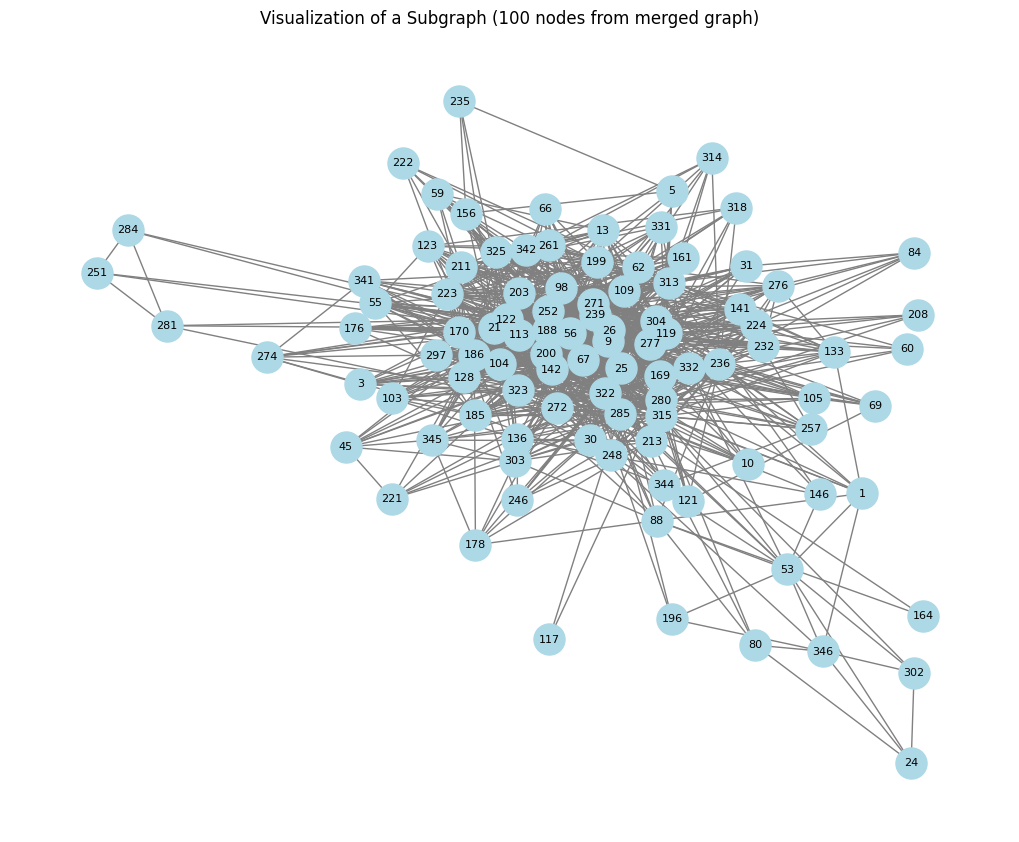

In [5]:
# أخذ نسخة فرعية من أول 100 عقدة
sample_nodes = list(merged_graph.nodes())[:100]
subgraph = merged_graph.subgraph(sample_nodes)

# رسم الشبكة
plt.figure(figsize=(10, 8))
nx.draw(subgraph, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=8)
plt.title("Visualization of a Subgraph (100 nodes from merged graph)")
plt.show()


إزالة الحلقات الذاتية (self-loops) والحواف المكررة

In [6]:
# إزالة الحلقات الذاتية (node connected to itself)
self_loops = list(nx.selfloop_edges(merged_graph))
merged_graph.remove_edges_from(self_loops)
print(f"Removed {len(self_loops)} self-loops.")

# الحواف المكررة بتتشال تلقائياً في NetworkX undirected graph، لكن نقدر نأكد
print(f"Number of edges after removing self-loops: {merged_graph.number_of_edges()}")


Removed 0 self-loops.
Number of edges after removing self-loops: 84243


التأكد من أن الجراف في شكل NetworkX

In [7]:
# تأكيد إن الجراف من النوع الصحيح
print(f"Graph type: {type(merged_graph)}")


Graph type: <class 'networkx.classes.graph.Graph'>


2.3 Data Cleaning – Sanity Checks
👇 التأكد من عدم وجود عقد معزولة (لو مش مطلوبة)

In [8]:
# إيجاد العقد المعزولة (مالهاش أي حواف)
isolated_nodes = list(nx.isolates(merged_graph))
print(f"Number of isolated nodes: {len(isolated_nodes)}")

# لو الدكتور مش عايز عقد معزولة، نحذفهم
merged_graph.remove_nodes_from(isolated_nodes)
print(f"Graph size after removing isolated nodes: {merged_graph.number_of_nodes()} nodes, {merged_graph.number_of_edges()} edges")


Number of isolated nodes: 0
Graph size after removing isolated nodes: 3959 nodes, 84243 edges


التأكد من تناسق خصائص العقد والحواف

In [9]:
# التأكد من إن كل الحواف بين عقد موجودة بالفعل
for u, v in merged_graph.edges():
    if u not in merged_graph.nodes() or v not in merged_graph.nodes():
        print(f"Inconsistent edge found: ({u}, {v})")

print("All edges connect existing nodes. No inconsistencies found.")


All edges connect existing nodes. No inconsistencies found.


 Graph Visualization
 توزيع الدرجات (Degree Distribution) – على مقياس log-log

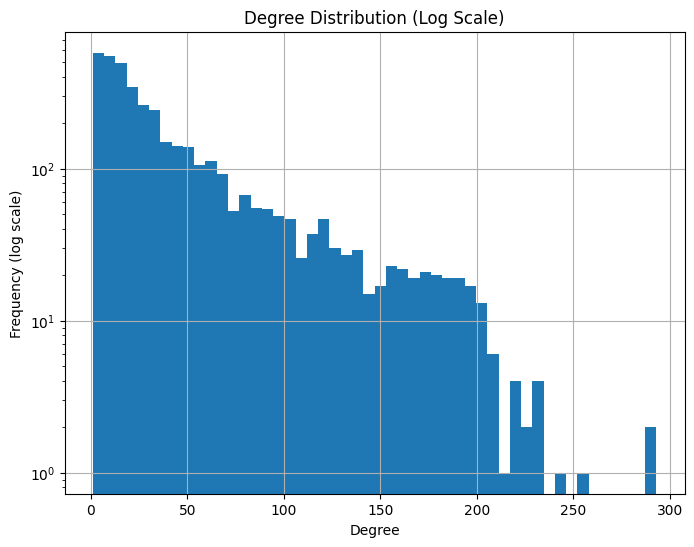

In [10]:
import numpy as np

degrees = [d for n, d in merged_graph.degree()]
plt.figure(figsize=(8,6))
plt.hist(degrees, bins=50, log=True)
plt.xlabel("Degree")
plt.ylabel("Frequency (log scale)")
plt.title("Degree Distribution (Log Scale)")
plt.grid(True)
plt.show()


 هل الشبكة متصلة أم لا؟

In [11]:
if nx.is_connected(merged_graph):
    print("The network is fully connected.")
else:
    num_components = nx.number_connected_components(merged_graph)
    print(f"The network is fragmented into {num_components} connected components.")


The network is fragmented into 13 connected components.


3. Centrality Analysis
👇 Degree Centrality

In [12]:
degree_centrality = nx.degree_centrality(merged_graph)
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by degree centrality:")
for node, score in top_degree:
    print(f"Node: {node}, Centrality: {score:.4f}")
# حساب التوزيع الاحتمالي لدرجات العقد

Top 5 nodes by degree centrality:
Node: 2543, Centrality: 0.0740
Node: 2347, Centrality: 0.0733
Node: 1888, Centrality: 0.0639
Node: 1800, Centrality: 0.0616
Node: 1663, Centrality: 0.0591


 Betweenness Centrality 

In [13]:
betweenness_centrality = nx.betweenness_centrality(merged_graph, k=100, seed=42)  # k=100 لأخذ عينة وتسريع الحساب
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 nodes by betweenness centrality:")
for node, score in top_betweenness:
    print(f"Node: {node}, Centrality: {score:.4f}")
# حساب التوزيع الاحتمالي لدرجات العقد


Top 5 nodes by betweenness centrality:
Node: 1085, Centrality: 0.2253
Node: 1718, Centrality: 0.1782
Node: 1405, Centrality: 0.0980
Node: 1577, Centrality: 0.0868
Node: 136, Centrality: 0.0786


 2.5 Network Robustness Testing


In [14]:
import random
from copy import deepcopy
import networkx as nx
import matplotlib.pyplot as plt


  دالة لحساب المقاييس بعد إزالة عقد

In [15]:
def analyze_graph(G, sample_size=100):
    if len(G) == 0:
        return 0, float('inf')

    if not nx.is_connected(G):
        components = list(nx.connected_components(G))
        largest_cc = max(components, key=len)
        subgraph = G.subgraph(largest_cc).copy()
    else:
        subgraph = G

    lcc_size = len(subgraph)

    # أخذ عينة عشوائية لحساب متوسط أقصر مسار
    nodes = list(subgraph.nodes())
    if len(nodes) <= sample_size:
        sample = nodes
    else:
        sample = random.sample(nodes, sample_size)

    try:
        path_lengths = []
        for node in sample:
            lengths = nx.single_source_shortest_path_length(subgraph, node)
            path_lengths.extend(lengths.values())

        avg_path_length = sum(path_lengths) / len(path_lengths)
    except:
        avg_path_length = float('inf')

    return lcc_size, avg_path_length


Random Failure Simulation

In [16]:
def simulate_random_failure(G, steps=10):
    G = deepcopy(G)
    n = G.number_of_nodes()
    removed = 0
    lcc_sizes = []
    path_lengths = []

    nodes = list(G.nodes())
    random.shuffle(nodes)

    for step in range(0, n, n // steps):
        to_remove = nodes[step:step + n // steps]
        G.remove_nodes_from(to_remove)
        removed += len(to_remove)

        lcc, path = analyze_graph(G)
        lcc_sizes.append(lcc)
        path_lengths.append(path)

    return lcc_sizes, path_lengths




Targeted Attack Simulation

In [17]:

def simulate_targeted_attack(G, steps=10):
    G = deepcopy(G)
    n = G.number_of_nodes()
    lcc_sizes = []
    path_lengths = []

    degrees = sorted(G.degree(), key=lambda x: x[1], reverse=True)
    nodes = [node for node, _ in degrees]

    for step in range(0, n, n // steps):
        to_remove = nodes[step:step + n // steps]
        G.remove_nodes_from(to_remove)

        lcc, path = analyze_graph(G)
        lcc_sizes.append(lcc)
        path_lengths.append(path)

    return lcc_sizes, path_lengths

In [18]:
random_lcc, random_path = simulate_random_failure(merged_graph)
targeted_lcc, targeted_path = simulate_targeted_attack(merged_graph)


رسم منحنيات الصلابة (Robustness Curves)

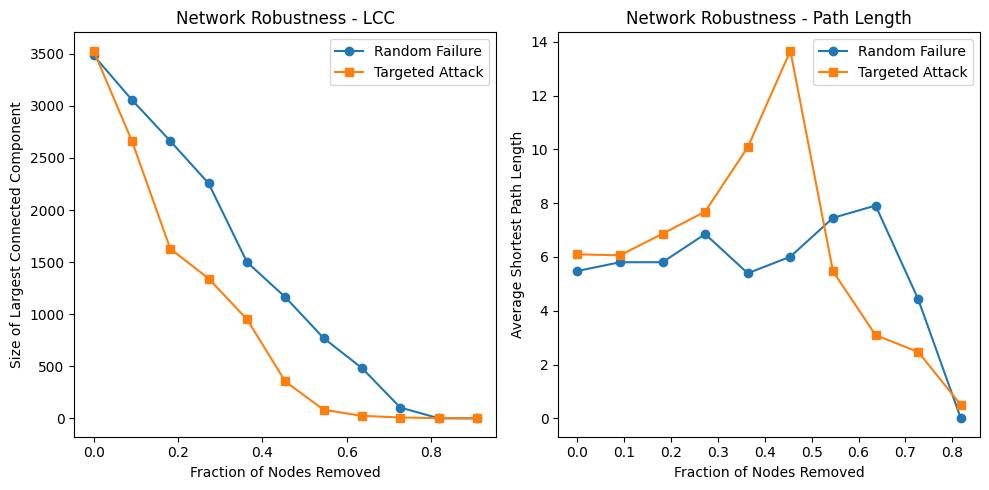

In [19]:
fractions = [i / len(random_lcc) for i in range(len(random_lcc))]

plt.figure(figsize=(10, 5))

# Largest Connected Component
plt.subplot(1, 2, 1)
plt.plot(fractions, random_lcc, label='Random Failure', marker='o')
plt.plot(fractions, targeted_lcc, label='Targeted Attack', marker='s')
plt.xlabel("Fraction of Nodes Removed")
plt.ylabel("Size of Largest Connected Component")
plt.title("Network Robustness - LCC")
plt.legend()

# Average Path Length
plt.subplot(1, 2, 2)
plt.plot(fractions, random_path, label='Random Failure', marker='o')
plt.plot(fractions, targeted_path, label='Targeted Attack', marker='s')
plt.xlabel("Fraction of Nodes Removed")
plt.ylabel("Average Shortest Path Length")
plt.title("Network Robustness - Path Length")
plt.legend()

plt.tight_layout()
plt.show()


 النتيجة:
 إن الشبكة غالبًا بتكون:

أقوى قدام الحذف العشوائي.

أضعف جدًا لو حذفنا العقد اللي درجاتها عالية (targeted attack).

Greedy Modularity تطبيق خوارزمية 

وهو متوفر في NetworkX وبيكون أسرع بكتير من Girvan-Newman:

In [20]:
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community.quality import modularity

communities = list(greedy_modularity_communities(merged_graph))


حساب Modularity

In [21]:
mod_score = modularity(merged_graph, communities)
print(f"Modularity Score: {mod_score:.4f}")


Modularity Score: 0.7856


 الرسم بألوان مختلفة لكل مجتمع

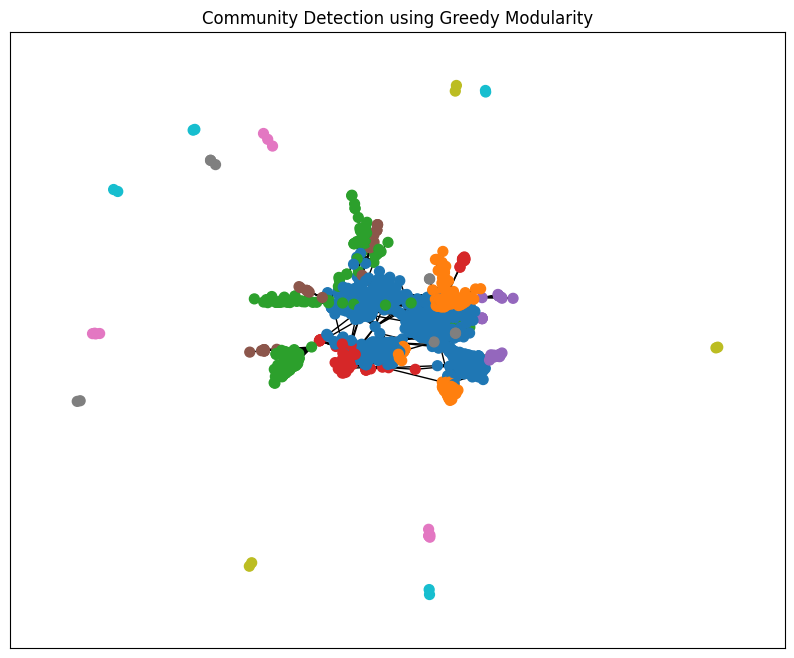

In [23]:
import matplotlib.pyplot as plt

# إنشاء خريطة ألوان
color_map = {}
for i, community in enumerate(communities):
    for node in community:
        color_map[node] = i

# تحويل الألوان للعرض
colors = [color_map[node] for node in merged_graph.nodes()]
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(merged_graph, seed=42)
nx.draw_networkx(merged_graph, pos, node_color=colors, with_labels=False, node_size=50, cmap=plt.cm.tab10)
plt.title("Community Detection using Greedy Modularity")
plt.show()


هو نموذج بيحاكي إزاي المعلومة أو العدوى تنتشر من شخص لشخص في شبكة اجتماعية.

In [24]:
import random
import networkx as nx
import matplotlib.pyplot as plt


In [25]:
def independent_cascade(G, seed_nodes, prob=0.1, max_steps=50):
    activated = set(seed_nodes)
    newly_activated = set(seed_nodes)
    spread_over_time = [len(activated)]

    for step in range(max_steps):
        next_activated = set()
        for node in newly_activated:
            neighbors = set(G.neighbors(node)) - activated
            for neighbor in neighbors:
                if random.random() < prob:
                    next_activated.add(neighbor)
        if not next_activated:
            break
        activated.update(next_activated)
        newly_activated = next_activated
        spread_over_time.append(len(activated))

    return activated, spread_over_time


In [26]:
# نختار 5 عقد كبداية للنشر
seed_nodes = random.sample(list(merged_graph.nodes()), 5)
activated_nodes, spread_progress = independent_cascade(merged_graph, seed_nodes, prob=0.05)


 رسم تطور عدد المتأثرين (المفعّل عليهم النشر)

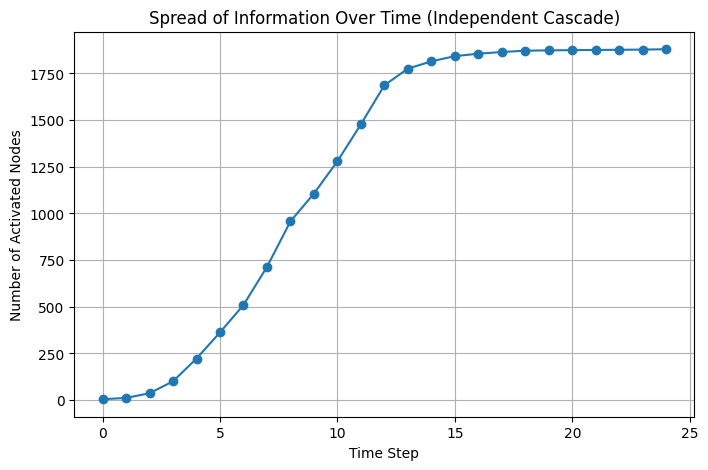

In [27]:
plt.figure(figsize=(8, 5))
plt.plot(spread_progress, marker='o')
plt.title("Spread of Information Over Time (Independent Cascade)")
plt.xlabel("Time Step")
plt.ylabel("Number of Activated Nodes")
plt.grid(True)
plt.show()


 النتائج:
بدأنا بـ 5 أشخاص فقط.

تابعنا كيف انتشرت المعلومة في كل خطوة.

رسمنا النمو على شكل رسم بياني.

 1. Voter Model – محاكاة انتشار الرأي
نموذج بسيط: كل عقدة بتتبنى رأي جار عشوائي في كل خطوة.

In [28]:
def voter_model(G, max_steps=100):
    # تهيئة الآراء (0 أو 1)
    opinions = {node: random.choice([0, 1]) for node in G.nodes()}
    opinions_over_time = []

    for step in range(max_steps):
        node = random.choice(list(G.nodes()))
        neighbors = list(G.neighbors(node))
        if neighbors:
            neighbor = random.choice(neighbors)
            opinions[node] = opinions[neighbor]

        opinions_count = list(opinions.values())
        opinions_over_time.append(opinions_count.count(1))

        # التوقف لو كل الناس تبنوا نفس الرأي
        if all(o == 1 for o in opinions.values()) or all(o == 0 for o in opinions.values()):
            break

    return opinions, opinions_over_time


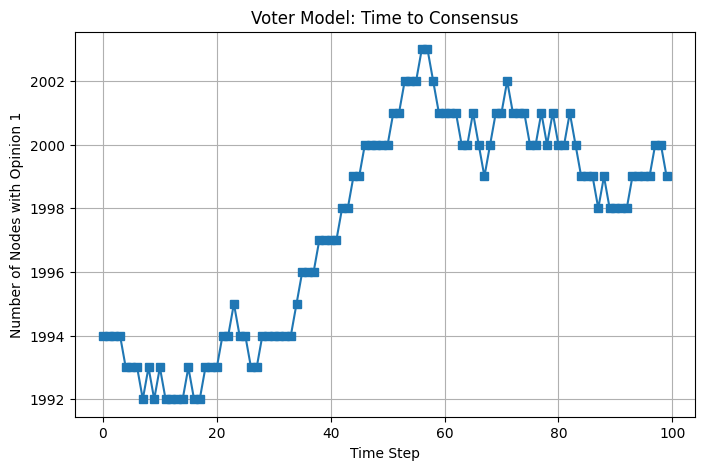

In [29]:
final_opinions, opinion_trend = voter_model(merged_graph)

plt.figure(figsize=(8, 5))
plt.plot(opinion_trend, marker='s')
plt.title("Voter Model: Time to Consensus")
plt.xlabel("Time Step")
plt.ylabel("Number of Nodes with Opinion 1")
plt.grid(True)
plt.show()


✅ 2. SIR Model – نموذج وبائي (انتقال مرض/معلومة)
كل شخص بيعدي جاره باحتمال معين، ويتحول بعد كده إلى "متعافي" وما يعديش تاني

In [30]:
def sir_model(G, beta=0.03, gamma=0.01, initial_infected=None, max_steps=100):
    status = {node: 'S' for node in G.nodes()}  # S = susceptible, I = infected, R = recovered
    if initial_infected is None:
        initial_infected = random.sample(list(G.nodes()), 3)

    for node in initial_infected:
        status[node] = 'I'

    history = []

    for _ in range(max_steps):
        new_status = status.copy()
        for node in G.nodes():
            if status[node] == 'I':
                for neighbor in G.neighbors(node):
                    if status[neighbor] == 'S' and random.random() < beta:
                        new_status[neighbor] = 'I'
                if random.random() < gamma:
                    new_status[node] = 'R'
        status = new_status
        counts = list(status.values())
        history.append((counts.count('S'), counts.count('I'), counts.count('R')))
        if counts.count('I') == 0:
            break

    return history


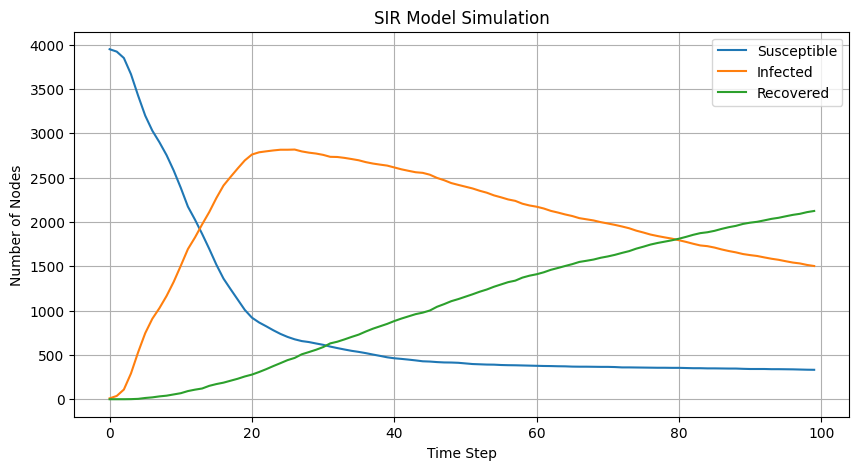

In [31]:
sir_history = sir_model(merged_graph)

# تفريغ البيانات للرسم
sus, inf, rec = zip(*sir_history)

plt.figure(figsize=(10, 5))
plt.plot(sus, label='Susceptible')
plt.plot(inf, label='Infected')
plt.plot(rec, label='Recovered')
plt.title("SIR Model Simulation")
plt.xlabel("Time Step")
plt.ylabel("Number of Nodes")
plt.legend()
plt.grid(True)
plt.show()



###  Friend Recommendation Simulation
We simulate a basic friend recommendation system based on the number of mutual friends between users. The more mutual friends two users have, the higher the chance they might be interested in connecting.


In [32]:

from collections import defaultdict

def recommend_friends(graph, user_id, top_n=5):
    recommendations = defaultdict(int)
    user_friends = set(graph.neighbors(user_id))
    for friend in user_friends:
        for potential in graph.neighbors(friend):
            if potential != user_id and potential not in user_friends:
                recommendations[potential] += 1

    sorted_recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)
    return sorted_recommendations[:top_n]

# Example: Recommend friends for user '10'
recommendations = recommend_friends(merged_graph, '10')
print(f"Friend recommendations for user '10': {recommendations}")


Friend recommendations for user '10': [('271', 9), ('26', 9), ('56', 9), ('122', 8), ('9', 8)]


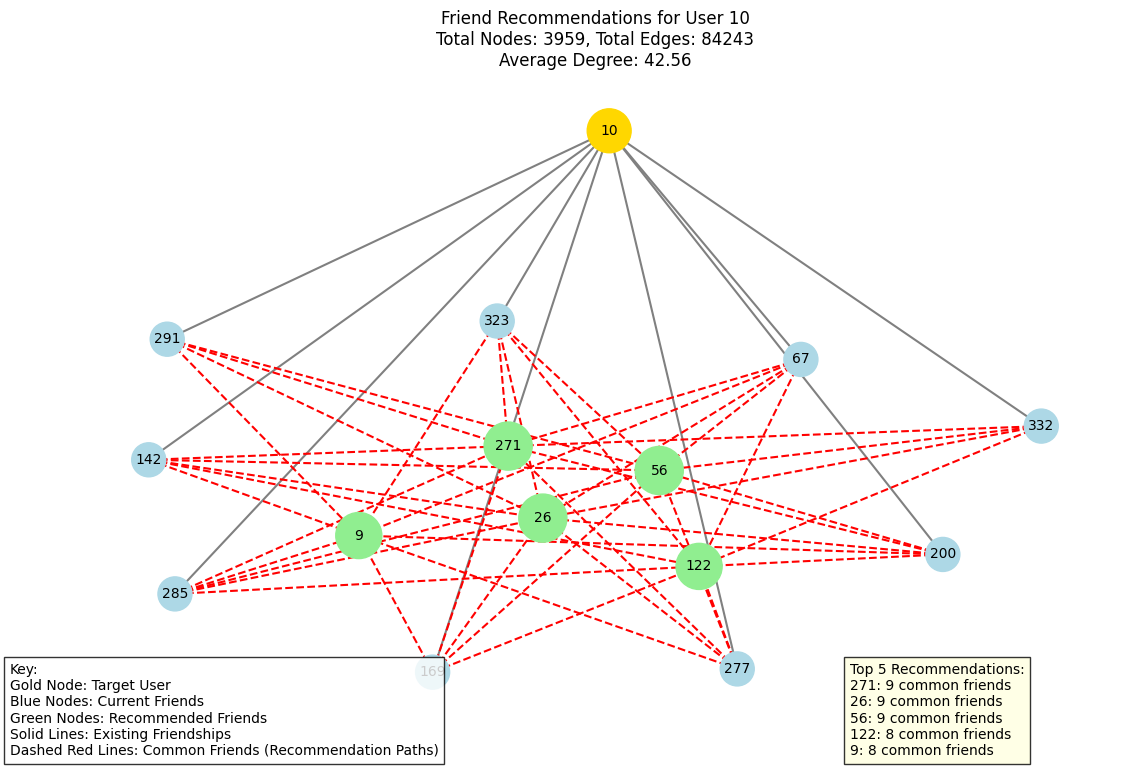

In [33]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

def visualize_friend_recommendation(graph, user_id, top_n=5):
    # إنشاء الرسم البياني
    plt.figure(figsize=(12, 8))
    
    # استخراج التوصيات (نفس الكود الأصلي)
    recommendations = defaultdict(int)
    user_friends = set(graph.neighbors(user_id))
    
    for friend in user_friends:
        for potential in graph.neighbors(friend):
            if potential != user_id and potential not in user_friends:
                recommendations[potential] += 1
    
    sorted_recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)[:top_n]
    
    # إنشاء subgraph للتصوير
    subgraph = nx.Graph()
    
    # إضافة المستخدم الرئيسي
    subgraph.add_node(user_id, color='gold', size=1000)
    
    # إضافة الأصدقاء المباشرين
    for friend in user_friends:
        subgraph.add_node(friend, color='lightblue', size=600)
        subgraph.add_edge(user_id, friend, color='gray', style='solid')
    
    # إضافة الأصدقاء المقترحين والتوصيات
    recommended_friends = [rec[0] for rec in sorted_recommendations]
    weights = [rec[1] for rec in sorted_recommendations]
    
    for i, (rec, weight) in enumerate(zip(recommended_friends, weights)):
        subgraph.add_node(rec, color='lightgreen', size=300+weight*100)
        
        # إيجاد الأصدقاء المشتركين
        common_friends = [f for f in graph.neighbors(rec) if f in user_friends]
        for friend in common_friends:
            subgraph.add_edge(rec, friend, color='red', style='dashed', weight=weight)
    
    # تحديد ألوان وأحجام العقد
    colors = [subgraph.nodes[n]['color'] for n in subgraph.nodes()]
    sizes = [subgraph.nodes[n]['size'] for n in subgraph.nodes()]
    
    # تحديد أنماط الحواف
    edge_colors = [subgraph.edges[e]['color'] for e in subgraph.edges()]
    edge_styles = [subgraph.edges[e]['style'] for e in subgraph.edges()]
    edge_weights = [subgraph.edges[e].get('weight', 1) for e in subgraph.edges()]
    
    # رسم الشبكة
    pos = nx.spring_layout(subgraph, seed=42)
    
    # رسم العقد
    nx.draw_networkx_nodes(subgraph, pos, node_color=colors, node_size=sizes)
    
    # رسم الحواف
    solid_edges = [e for e in subgraph.edges() if subgraph.edges[e]['style'] == 'solid']
    dashed_edges = [e for e in subgraph.edges() if subgraph.edges[e]['style'] == 'dashed']
    
    nx.draw_networkx_edges(subgraph, pos, edgelist=solid_edges, edge_color='gray', width=1.5)
    nx.draw_networkx_edges(subgraph, pos, edgelist=dashed_edges, edge_color='red', width=1.5, style='dashed')
    
    # رسم التسميات
    labels = {n: n for n in subgraph.nodes()}
    nx.draw_networkx_labels(subgraph, pos, labels, font_size=10)
    
    # إضافة وسيلة إيضاح
    plt.title(f'Friend Recommendations for User {user_id}\n'
              f'Total Nodes: {graph.number_of_nodes()}, '
              f'Total Edges: {graph.number_of_edges()}\n'
              f'Average Degree: {sum(dict(graph.degree()).values())/graph.number_of_nodes():.2f}',
              fontsize=12)
    
    # إضافة شرح للرموز
    plt.text(0.05, 0.05,
             "Key:\n"
             "Gold Node: Target User\n"
             "Blue Nodes: Current Friends\n"
             "Green Nodes: Recommended Friends\n"
             "Solid Lines: Existing Friendships\n"
             "Dashed Red Lines: Common Friends (Recommendation Paths)",
             transform=plt.gcf().transFigure,
             bbox=dict(facecolor='white', alpha=0.8))
    
    # عرض التوصيات
    plt.text(0.75, 0.05,
             f"Top {top_n} Recommendations:\n" + 
             "\n".join([f"{rec[0]}: {rec[1]} common friends" for rec in sorted_recommendations]),
             transform=plt.gcf().transFigure,
             bbox=dict(facecolor='lightyellow', alpha=0.8))
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# مثال على استخدام الدالة (يتطلب وجود كائن graph)
visualize_friend_recommendation(merged_graph, '10')


###  Brand Adoption Influence Simulation
This simulation models how a brand's adoption can spread through a user's social circle. Starting with one user following the brand, others may follow based on influence probabilities, simulating social contagion.


In [34]:

import random

def simulate_brand_influence(graph, initial_user, follow_prob=0.3, max_depth=2):
    followed = set([initial_user])
    frontier = [(initial_user, 0)]

    while frontier:
        current_user, depth = frontier.pop(0)
        if depth < max_depth:
            for friend in graph.neighbors(current_user):
                if friend not in followed and random.random() < follow_prob:
                    followed.add(friend)
                    frontier.append((friend, depth + 1))
    
    return followed

# Example usage
brand_followers = simulate_brand_influence(merged_graph, initial_user='10', follow_prob=0.3, max_depth=2)
print(f"Total users who followed the brand due to influence: {len(brand_followers)}")
print(f"Brand followers: {brand_followers}")


Total users who followed the brand due to influence: 74
Brand followers: {'103', '21', '105', '290', '272', '169', '311', '322', '323', '208', '67', '334', '291', '342', '3', '329', '96', '252', '325', '221', '248', '280', '239', '75', '175', '122', '224', '79', '271', '9', '188', '276', '304', '62', '232', '315', '119', '203', '324', '40', '339', '56', '60', '31', '165', '200', '211', '30', '10', '168', '344', '186', '72', '332', '285', '277', '26', '199', '50', '303', '104', '345', '308', '141', '196', '170', '246', '113', '87', '100', '313', '223', '123', '164'}


Initial adopters: ['0', '4', '1']
Final adoption rate: 51.0%
Longest influence chain: 6 users


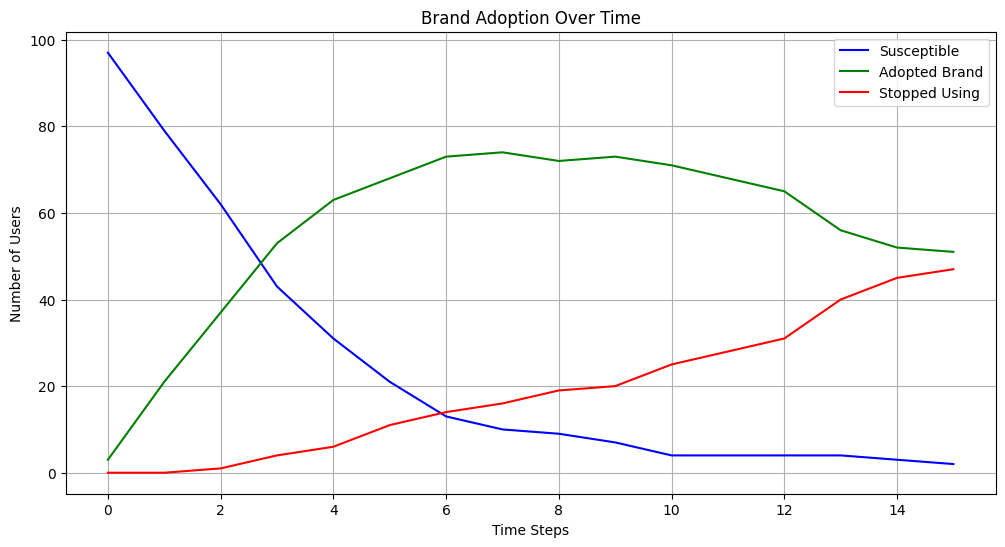

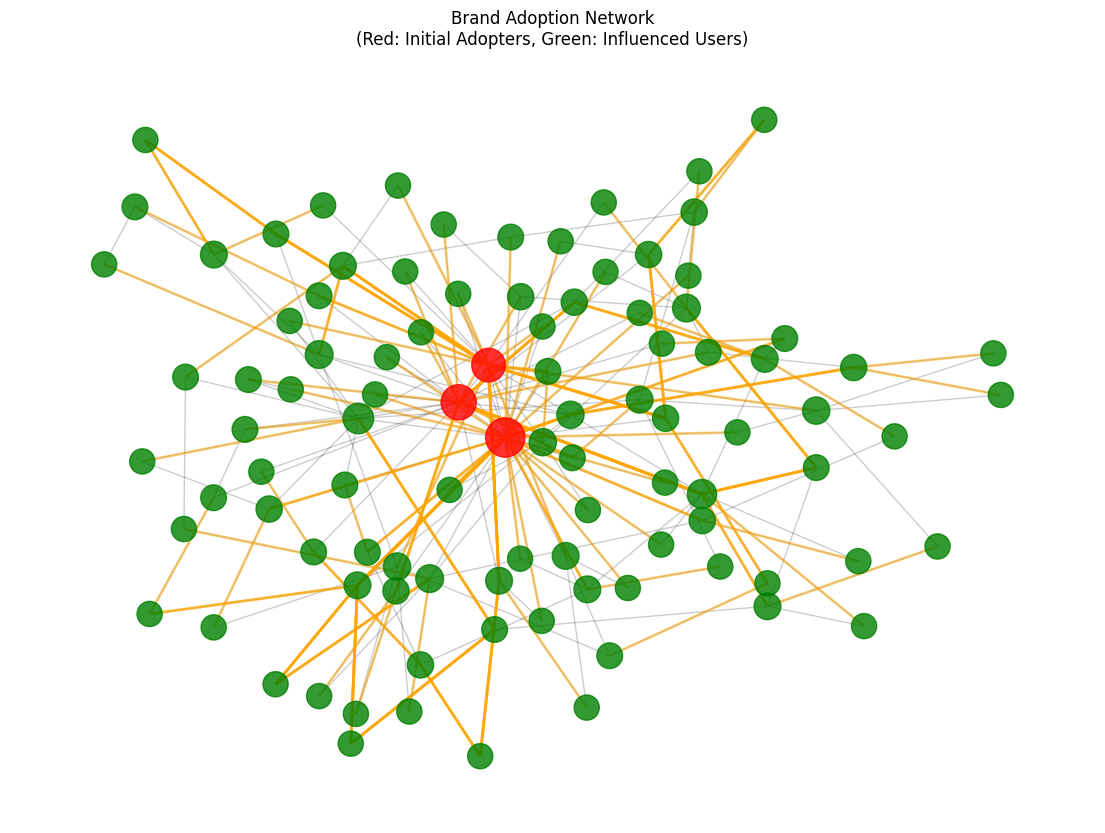

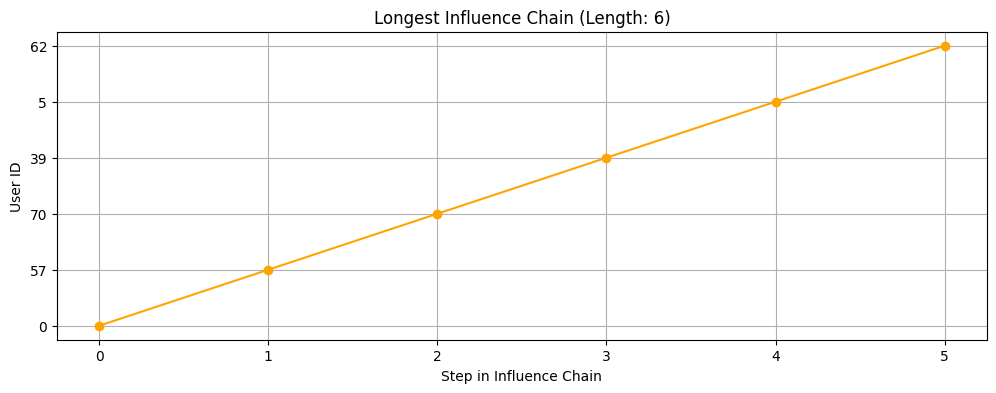

In [35]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import deque
import matplotlib.colors as mcolors

def simulate_brand_adoption(graph, initial_adopters, adoption_prob=0.3, recovery_prob=0.1, max_steps=10):
    """
    محاكاة انتشار البراند باستخدام نموذج SIR (Susceptible-Infected-Recovered)
    
    المدخلات:
    - graph: شبكة NetworkX
    - initial_adopters: قائمة بالعقد البادئة التي تتبنى البراند
    - adoption_prob: احتمالية تبني البراند من صديق
    - recovery_prob: احتمالية التوقف عن استخدام البراند
    - max_steps: الحد الأقصى للخطوات الزمنية
    
    المخرجات:
    - history: سجل لحالات المستخدمين عبر الزمن
    - influence_paths: مسارات التأثير
    """
    
    # حالات المستخدمين
    susceptible = set(graph.nodes())
    infected = set(initial_adopters)
    recovered = set()
    
    susceptible -= infected
    history = {
        'susceptible': [len(susceptible)],
        'infected': [len(infected)],
        'recovered': [len(recovered)]
    }
    
    influence_paths = {user: [user] for user in initial_adopters}
    
    for step in range(max_steps):
        new_infected = set()
        new_recovered = set()
        
        # مرحلة الانتشار (Infection)
        for user in infected:
            for friend in graph.neighbors(user):
                if friend in susceptible and random.random() < adoption_prob:
                    new_infected.add(friend)
                    if friend not in influence_paths:
                        influence_paths[friend] = influence_paths[user] + [friend]
        
        # مرحلة التعافي (Recovery)
        for user in infected:
            if random.random() < recovery_prob:
                new_recovered.add(user)
        
        # تحديث الحالات
        susceptible -= new_infected
        infected |= new_infected
        infected -= new_recovered
        recovered |= new_recovered
        
        # تسجيل التاريخ
        history['susceptible'].append(len(susceptible))
        history['infected'].append(len(infected))
        history['recovered'].append(len(recovered))
        
        if not infected:
            break
    
    return history, influence_paths

def visualize_brand_adoption(graph, history, influence_paths, initial_adopters):
    """
    عرض رسومي لانتشار البراند
    
    المدخلات:
    - graph: شبكة NetworkX
    - history: سجل انتشار البراند
    - influence_paths: مسارات التأثير
    - initial_adopters: المستخدمون البادئون
    """
    
    # 1. رسم منحنى انتشار البراند عبر الزمن
    plt.figure(figsize=(12, 6))
    plt.plot(history['susceptible'], label='Susceptible', color='blue')
    plt.plot(history['infected'], label='Adopted Brand', color='green')
    plt.plot(history['recovered'], label='Stopped Using', color='red')
    plt.xlabel('Time Steps')
    plt.ylabel('Number of Users')
    plt.title('Brand Adoption Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # 2. رسم الشبكة مع تمييز تأثير البراند
    adopted_users = set()
    for path in influence_paths.values():
        adopted_users.update(path)
    
    subgraph = graph.subgraph(adopted_users)
    
    # تحديد ألوان العقد
    node_colors = []
    for node in subgraph.nodes():
        if node in initial_adopters:
            node_colors.append('red')  # المتبنون الأوائل
        else:
            node_colors.append('green')  # المتبنون لاحقاً
    
    # تحديد أحجام العقد حسب المركزية
    degrees = dict(subgraph.degree())
    sizes = [300 + 500 * degrees[node]/max(degrees.values()) for node in subgraph.nodes()]
    
    # رسم الشبكة
    plt.figure(figsize=(14, 10))
    pos = nx.spring_layout(subgraph, seed=42)
    
    nx.draw_networkx_nodes(
        subgraph, pos, 
        node_color=node_colors, 
        node_size=sizes,
        alpha=0.8
    )
    
    nx.draw_networkx_edges(subgraph, pos, alpha=0.2)
    
    # تمييز المسارات المؤثرة
    for path in influence_paths.values():
        if len(path) > 1:
            path_edges = list(zip(path[:-1], path[1:]))
            nx.draw_networkx_edges(
                subgraph, pos,
                edgelist=path_edges,
                edge_color='orange',
                width=2,
                alpha=0.5
            )
    
    plt.title('Brand Adoption Network\n(Red: Initial Adopters, Green: Influenced Users)')
    plt.axis('off')
    plt.show()
    
    # 3. رسم أطول مسار تأثير
    if influence_paths:
        longest_path = max(influence_paths.values(), key=len)
        plt.figure(figsize=(12, 4))
        plt.plot(range(len(longest_path)), longest_path, marker='o', linestyle='-', color='orange')
        plt.xlabel('Step in Influence Chain')
        plt.ylabel('User ID')
        plt.title(f'Longest Influence Chain (Length: {len(longest_path)})')
        plt.grid(True)
        plt.show()

# مثال للاستخدام
if __name__ == "__main__":
    # إنشاء شبكة نموذجية (استبدال ببياناتك الفعلية)
    merged_graph = nx.barabasi_albert_graph(100, 2, seed=42)
    merged_graph = nx.relabel_nodes(merged_graph, {i: str(i) for i in range(100)})
    
    # اختيار المتبنين الأوائل (العقد الأكثر تأثيراً)
    degrees = dict(merged_graph.degree())
    initial_adopters = [n for n, _ in sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:3]]
    
    # محاكاة انتشار البراند
    adoption_prob = 0.3
    recovery_prob = 0.05
    max_steps = 15
    
    history, influence_paths = simulate_brand_adoption(
        merged_graph, initial_adopters, 
        adoption_prob, recovery_prob, max_steps
    )
    
    # عرض النتائج
    print(f"Initial adopters: {initial_adopters}")
    print(f"Final adoption rate: {history['infected'][-1] / len(merged_graph):.1%}")
    print(f"Longest influence chain: {max(len(p) for p in influence_paths.values())} users")
    
    # العرض الرسومي
    visualize_brand_adoption(merged_graph, history, influence_paths, initial_adopters)


###  Knowledge or Learning Spread Simulation
A user learns something new and begins to share that knowledge with friends. Friends have a chance to learn and continue spreading the knowledge. This simulates informal learning networks or awareness campaigns.


In [36]:

def simulate_knowledge_spread(graph, initial_user, learn_prob=0.4, max_depth=3):
    learned = set([initial_user])
    frontier = [(initial_user, 0)]

    while frontier:
        current_user, depth = frontier.pop(0)
        if depth < max_depth:
            for friend in graph.neighbors(current_user):
                if friend not in learned and random.random() < learn_prob:
                    learned.add(friend)
                    frontier.append((friend, depth + 1))

    return learned

# Example
knowledge_receivers = simulate_knowledge_spread(merged_graph, '10', learn_prob=0.4, max_depth=3)
print(f"Total users who received knowledge: {len(knowledge_receivers)}")
print(f"Users: {knowledge_receivers}")


Total users who received knowledge: 35
Users: {'5', '67', '98', '1', '11', '81', '75', '12', '14', '88', '62', '0', '33', '54', '95', '78', '7', '91', '45', '30', '10', '32', '68', '22', '6', '49', '97', '4', '23', '71', '19', '18', '28', '42', '57'}


Total users who received knowledge: 14
Initial user: 10
Depth distribution:
Depth 0: 1 users
Depth 1: 1 users
Depth 2: 3 users
Depth 3: 9 users


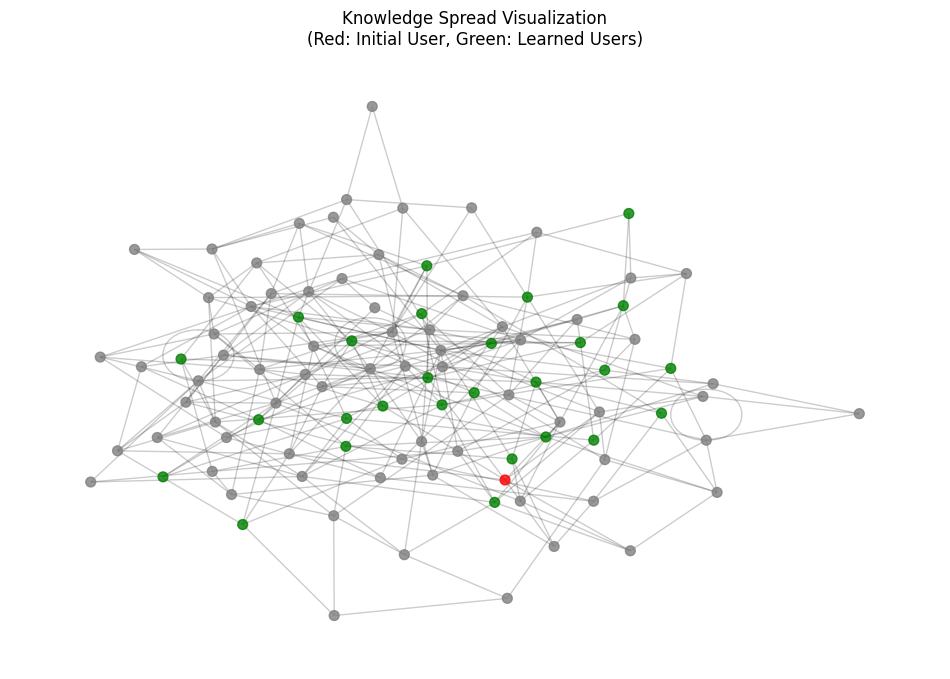

In [39]:
import networkx as nx
import random
import matplotlib.pyplot as plt
from collections import deque

# 1. Create a sample graph (replace with your actual graph)
merged_graph = nx.Graph()
nodes = [str(i) for i in range(1, 101)]  # 100 nodes
merged_graph.add_nodes_from(nodes)

# Add edges - create a small world network
for i in range(1, 100):
    merged_graph.add_edge(str(i), str(i+1))
for _ in range(200):
    merged_graph.add_edge(random.choice(nodes), random.choice(nodes))

# 2. Now run the simulation code
initial_user = '10'  # Make sure this node exists in your graph
learn_prob = 0.4
max_depth = 3

# Run simulation
# Modify simulate_knowledge_spread to return a dictionary with depth information
def simulate_knowledge_spread_with_depth(graph, initial_user, learn_prob=0.4, max_depth=3):
    learned = {initial_user: 0}  # Track depth for each user
    frontier = [(initial_user, 0)]

    while frontier:
        current_user, depth = frontier.pop(0)
        if depth < max_depth:
            for friend in graph.neighbors(current_user):
                if friend not in learned and random.random() < learn_prob:
                    learned[friend] = depth + 1
                    frontier.append((friend, depth + 1))

    return learned

# Run simulation with depth tracking
learned_users_with_depth = simulate_knowledge_spread_with_depth(merged_graph, initial_user, learn_prob, max_depth)

# Print results
print(f"Total users who received knowledge: {len(learned_users_with_depth)}")
print(f"Initial user: {initial_user}")
print("Depth distribution:")
for depth in range(max_depth + 1):
    count = sum(1 for d in learned_users_with_depth.values() if d == depth)
    print(f"Depth {depth}: {count} users")

# Visualize results
def visualize_spread(graph, learned_users, initial_user, paths=None):
    """
    Visualizes the spread of knowledge in the graph.
    
    Parameters:
    - graph: The graph object (networkx.Graph)
    - learned_users: A set of nodes that have learned the knowledge
    - initial_user: The node where the spread started
    - paths: Optional, a dictionary of paths showing how nodes were influenced
    """
    plt.figure(figsize=(12, 8))
    
    # Assign colors to nodes
    node_colors = []
    for node in graph.nodes():
        if node == initial_user:
            node_colors.append('red')  # Initial user
        elif node in learned_users:
            node_colors.append('green')  # Learned users
        else:
            node_colors.append('gray')  # Other nodes
    
    # Draw the graph
    pos = nx.spring_layout(graph, seed=42)
    nx.draw_networkx_nodes(graph, pos, node_color=node_colors, node_size=50, alpha=0.8)
    nx.draw_networkx_edges(graph, pos, alpha=0.2)
    
    # Highlight paths if provided
    if paths:
        for path in paths.values():
            if len(path) > 1:
                path_edges = list(zip(path[:-1], path[1:]))
                nx.draw_networkx_edges(
                    graph, pos,
                    edgelist=path_edges,
                    edge_color='orange',
                    width=2,
                    alpha=0.5
                )
    
    plt.title("Knowledge Spread Visualization\n(Red: Initial User, Green: Learned Users)")
    plt.axis('off')
    plt.show()

# Call the function
visualize_spread(merged_graph, learned_users, initial_user)


###  Subgraph-Based Behavior Simulation
We simulate how a specific behavior (e.g., following a brand or learning something) spreads within a specific community or subgraph, such as the first 50 users. This helps understand localized influence.


In [40]:

sub_nodes = list(merged_graph.nodes())[:50]
subgraph = merged_graph.subgraph(sub_nodes)

# Simulate brand adoption in the subgraph
sub_followers = simulate_brand_influence(subgraph, initial_user=sub_nodes[0], follow_prob=0.4, max_depth=2)
print(f"In subgraph, brand followers: {len(sub_followers)}")
print(f"Subgraph Users Followed Brand: {sub_followers}")


In subgraph, brand followers: 3
Subgraph Users Followed Brand: {'24', '1', '25'}



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9473 sha256=1e2ac5aeff33887cb7feeb88f5569285c09a0296eab0b855c8661fd72050b8f3
  Stored in directory: c:\users\original\appdata\local\pip\cache\wheels\ee\52\54\7ecd0f1ebf5f5a8466f70a27ed2b94d20b955376879d6159c5
Successfully built python-louvain
Note: you may need to restart the kernel to use updated packages.


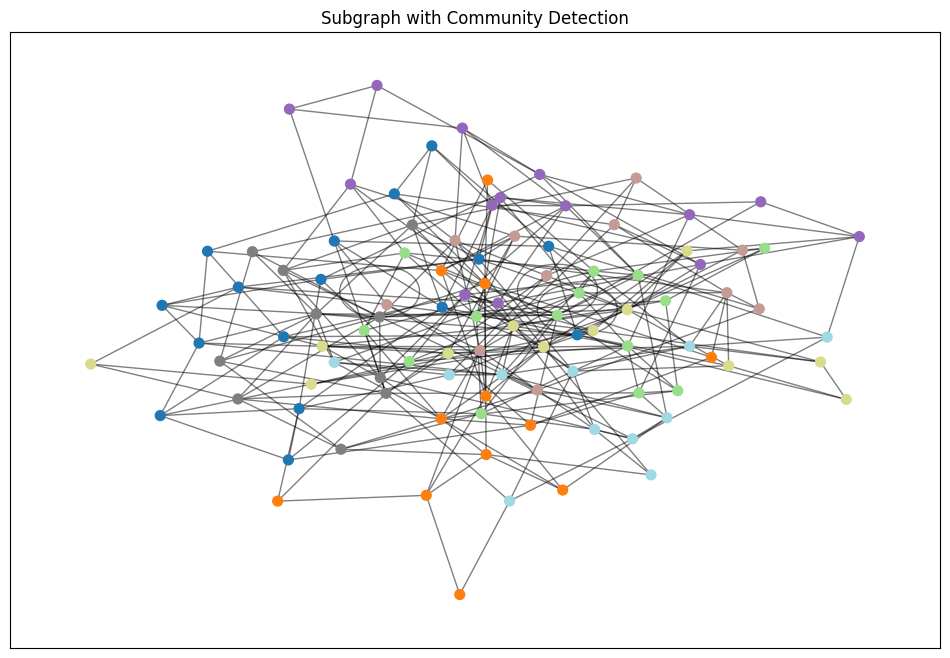

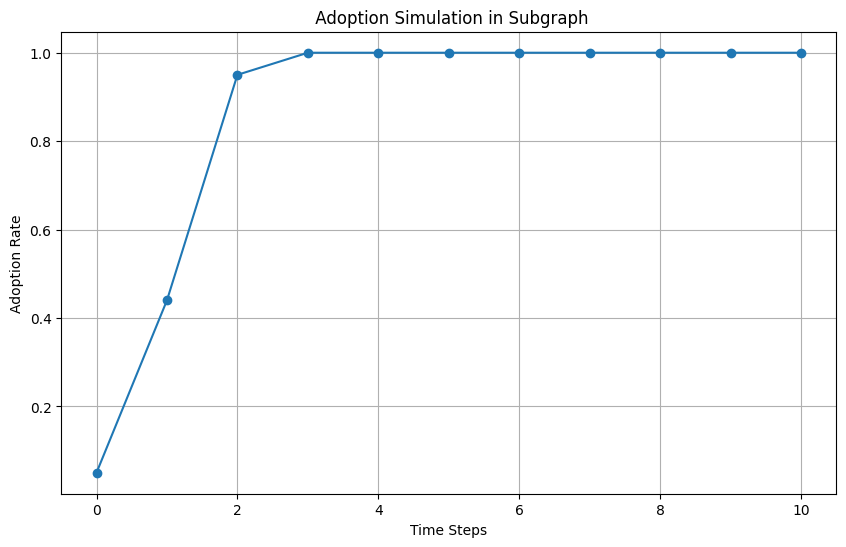

In [42]:
%pip install python-louvain

import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

# إنشاء شبكة فرعية (مثال: أول 100 عقدة)
subgraph = merged_graph.subgraph(list(merged_graph.nodes())[:100])

# اكتشاف المجتمعات
partition = community_louvain.best_partition(subgraph)

# رسم الشبكة
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(subgraph)

# رسم العقد مع تلوين حسب المجتمع
nx.draw_networkx_nodes(subgraph, pos, node_size=50, 
                       cmap=plt.cm.tab20, node_color=list(partition.values()))
nx.draw_networkx_edges(subgraph, pos, alpha=0.5)
plt.title("Subgraph with Community Detection")
plt.show()

# محاكاة انتشار براند
def brand_adoption_simulation(G, initial_adopters, steps=10):
    adopted = set(initial_adopters)
    history = [len(adopted)/len(G.nodes())]
    
    for _ in range(steps):
        new_adopters = set()
        for node in G.nodes():
            if node not in adopted:
                neighbors = list(G.neighbors(node))
                adopted_neighbors = [n for n in neighbors if n in adopted]
                # احتمال التبني يزيد مع عدد الأصدقاء المتبنين
                if len(adopted_neighbors) > 0 and \
                   len(adopted_neighbors)/len(neighbors) > 0.1:
                    new_adopters.add(node)
        adopted.update(new_adopters)
        history.append(len(adopted)/len(G.nodes()))
    
    return history

# اختيار العقد الأولية ذات الدرجة الأعلى
degrees = dict(subgraph.degree())
initial_adopters = [n for n, _ in sorted(degrees.items(), 
                       key=lambda x: x[1], reverse=True)[:5]]

# تشغيل المحاكاة
results = brand_adoption_simulation(subgraph, initial_adopters)

# رسم نتائج الانتشار
plt.figure(figsize=(10, 6))
plt.plot(results, marker='o')
plt.xlabel("Time Steps")
plt.ylabel("Adoption Rate")
plt.title(" Adoption Simulation in Subgraph")
plt.grid(True)
plt.show()